---
format: typst
echo: false
execute:
  enabled: true
---

In [1]:
city = "Corvallis"

In [2]:
# Injected Parameters
city = "Portland"


In [3]:
from IPython.display import Markdown
Markdown(f"# {city}")

# Portland

In [4]:
import polars as pl
from plotnine import *
from datetime import date
from calendar import month_name, month_abbr

In [5]:
this_month = date(2025, 5, 1)
highlight_color = "#FF5733" # A bright color for highlighting

In [6]:
tmean_oregon = pl.read_csv("data/tmean-oregon.csv", schema_overrides={"date": pl.Date})
tmean = tmean_oregon.filter(
    pl.col("city") == city,
)

In [7]:
#| include: false

tmean.head()

city,date,tmean,month,year,tmean_normal,tmean_diff,tmean_direction
str,date,f64,i64,i64,f64,f64,str
"""Portland""",2025-05-01,14.997999,5,2025,14.226,0.771999,"""warmer"""
"""Portland""",2025-04-01,12.374449,4,2025,10.7522,1.622249,"""warmer"""
"""Portland""",2025-03-01,9.8736,3,2025,8.4085,1.4651,"""warmer"""
"""Portland""",2025-02-01,5.4494,2,2025,6.3601,0.9107,"""cooler"""
"""Portland""",2025-01-01,4.76925,1,2025,5.1689,0.39965,"""cooler"""


In [8]:
this = tmean.filter(pl.col("date") == this_month).row(0, named=True)
Markdown(f"{month_name[this['month']]} {this['year']} was {abs(this['tmean_diff']):.1f}°C {this['tmean_direction']} than usual.")

May 2025 was 0.8°C warmer than usual.

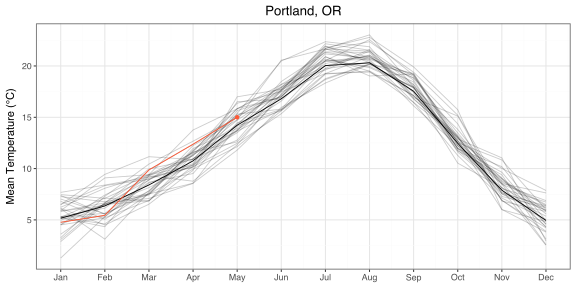

In [9]:
(
    ggplot(tmean, aes(x="month", y="tmean"))
    + geom_line(aes(group="year"), alpha=0.2)
    + geom_line(aes(y = "tmean_normal"))
    + geom_line(data=tmean.filter(pl.col("year") == 2025), color=highlight_color)
    + geom_point(
        data=tmean.filter(pl.col("date") == this_month), color=highlight_color
    )
    + scale_x_continuous(breaks=list(range(1, 13)), labels=list(month_abbr[1:]))
    + labs(title = f"{city}, OR", x="", y="Mean Temperature (°C)")
    + theme_bw() 
    + theme(figure_size = (8, 4))
)